In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
#Change numbers next to images and vae to get desired epoch and pretrain epoch
#epochs=3
#epochs+=-1
#pretrain_epochs=2

#real_path="real_images"+str(epochs)+"_vae"+str(pretrain_epochs)+".csv"
#fake_path="fake_images"+str(epochs)+"_vae"+str(pretrain_epochs)+".csv"

real=pd.read_csv("dcgan_vae_MNIST/real_images11_vae_gan.csv",header=None)
fake=pd.read_csv("dcgan_vae_MNIST/fake_images11_vae_gan.csv",header=None)
real.shape, fake.shape

((32, 784), (32, 784))

In [3]:
scaler = StandardScaler()
real=scaler.fit_transform(real)

scaler= StandardScaler()
fake=scaler.fit_transform(fake)

('Sum of explained variance for real:', 0.67419158335735463)
('Sum of explained variance for fake:', 0.68292563306902965)


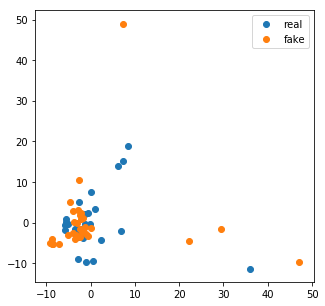

In [4]:
pca = PCA(n_components=10,svd_solver='arpack')
pca.fit(real)
real_pca = pca.transform(real)
print('Sum of explained variance for real:',pca.explained_variance_ratio_.sum())
pca.fit(fake)
fake_pca = pca.transform(fake)
print('Sum of explained variance for fake:',pca.explained_variance_ratio_.sum())

plt.figure( figsize=(5,5) )
plt.scatter(real_pca[:,0],real_pca[:,1],label='real')
plt.scatter(fake_pca[:,0],fake_pca[:,1],label='fake')
plt.legend()
plt.show()

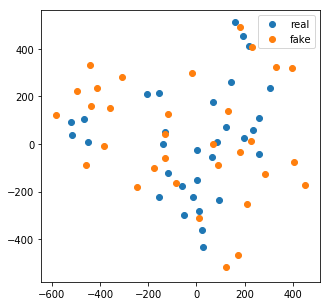

In [5]:
tsne=TSNE(n_components=2,perplexity=5)
real_tsne=tsne.fit_transform(real)
fake_tsne=tsne.fit_transform(fake)

plt.figure( figsize=(5,5) )
plt.scatter(real_tsne[:,0],real_tsne[:,1],label='real')
plt.scatter(fake_tsne[:,0],fake_tsne[:,1],label='fake')
plt.legend()
plt.show()

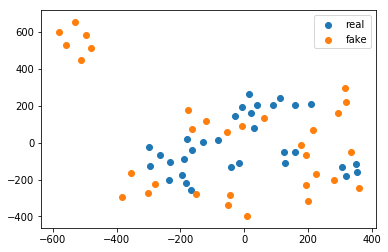

In [6]:
#With data passed first through PCA
tsne=TSNE(n_components=2,perplexity=5)
real_tsne_p=tsne.fit_transform(real_pca)
fake_tsne_p=tsne.fit_transform(fake_pca)

plt.scatter(real_tsne_p[:,0],real_tsne_p[:,1],label='real')
plt.scatter(fake_tsne_p[:,0],fake_tsne_p[:,1],label='fake')
plt.legend()
plt.show()